Àlex Escolà - Jaume Puigbò

<h1> Complex Networks </h1>

<h2> - Network analysis of Worldwide flights data from Openflights </h2>

This project aims to perform an analysis of a WorlWide airtraffic network, in which the airports play the role of nodes and the flights the role of links. A more detailed analysis is performed over the creation of a directional network, allthough in order to analyze some other properties the network has also been trated as an undirected network.

The quantity of equal flights, meaning that more than one airline offers the same route, has also been included in the network as the weight of each link.

In the first sections of the project several points of network analysis from a point of view of Graph theory have been analyzed and reviewed. The Degree distribution vs Degrees and Clustering coefficient vs Degrees graphs are also shown and analyzed in this section.

Further on we have also put a spetial interest in the analysis of the clusters that naturally arage from this network. The DPClus algorithm has been used in order to divide the network in different comunities, and these are afterwoods shown in a visualization implemented using D3.

And in the last section of the project we detail the aspects of the main visualization that has been performed for this project, which gives a clear and visual understanding of the most interconnected parts of the World and the hubbs. Interactivity features are also inclued in order to inspect each airport and its connections in more detail.

The following image is a visual representation of the network, obtained using D3, with the 100 most central airports and all routes between them, however all the data is used in the sections of the project.

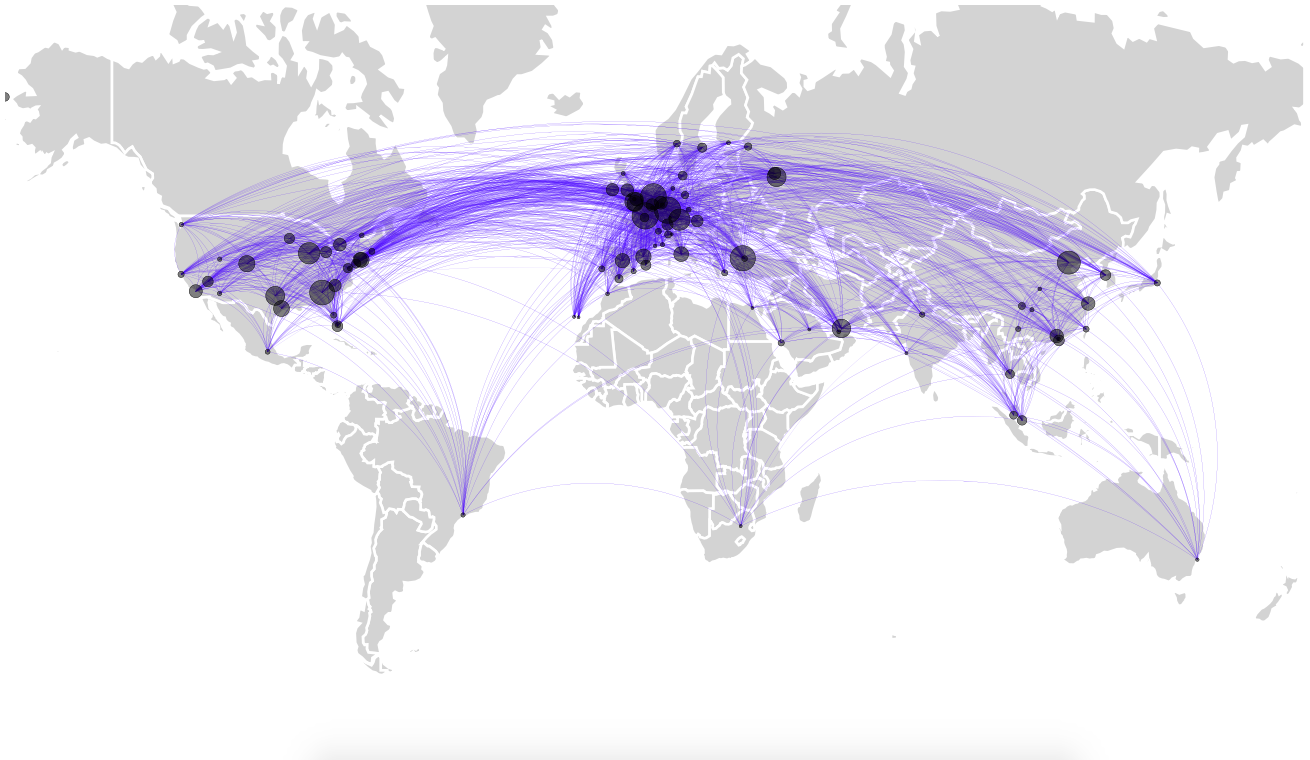

In [4]:
Image("images/D3.png")

In [3]:
import pandas as pd
import numpy as np
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import collections
from IPython.display import Image

The data was obtained from the following source: http://openflights.org/data.html


Loading the data:

In [8]:
routes = pd.read_csv('routes.csv',sep=',',header=None)

In [9]:
routes = routes.drop([0,1,3,5,6,7,8],axis=1)

In [10]:
routes.rename(columns={2: 'origin',4: 'destination'}, inplace=True)

The following airports are discarted from the network given that they are isolated nodes

In [11]:
isolated = ['BMY', 'GEA', 'ILP', 'KNQ', 'KOC', 'LIF', 'MEE', 'TGJ', 'TOU', 'UVE','ERS', 'MPA', 'NDU', 'OND','BFI', 'CLM', 'ESD', 'FRD','AKB', 'DUT', 'IKO', 'KQA','SPB', 'SSB','CKX', 'TKJ','BLD', 'GCW']

Routes excluding isolated nodes:

In [12]:
routes = routes[np.logical_not(routes.origin.isin(isolated))]
routes = routes[np.logical_not(routes.destination.isin(isolated))]

In [13]:
llista1=np.unique(routes.origin)
llista2=np.unique(routes.destination)
airports = np.unique(np.concatenate([llista1,llista2],axis=0))

Routes grouped by same origin and destination, this will allow us to have a measure of the quantity of lines with the same flight, which we will afterwoods use as the weight of the nodes:

In [14]:
routes_with_weight = routes.groupby(['origin', 'destination']).size()
routes_with_weight.head()

origin  destination
AAE     ALG            1
        CDG            1
        IST            1
        LYS            1
        MRS            2
dtype: int64

Defining the weights and links that will be introduced in the network:

In [15]:
links = routes_with_weight.index.unique()
weights = routes_with_weight.tolist()

In [16]:
input_tuple = [link + (weight,) for link, weight in zip (links, weights)]

In [17]:
input_tuple[:10]

[('AAE', 'ALG', 1),
 ('AAE', 'CDG', 1),
 ('AAE', 'IST', 1),
 ('AAE', 'LYS', 1),
 ('AAE', 'MRS', 2),
 ('AAE', 'ORN', 1),
 ('AAE', 'ORY', 2),
 ('AAL', 'AAR', 1),
 ('AAL', 'AGP', 1),
 ('AAL', 'ALC', 1)]

Distribution of the weights of the flights:

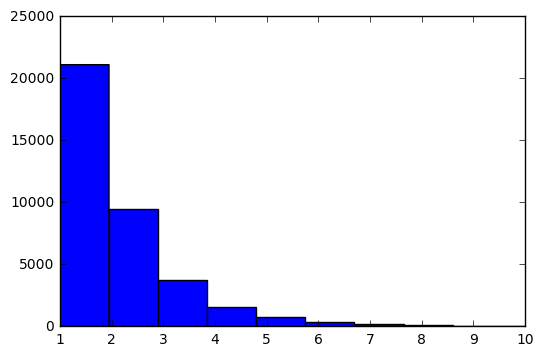

In [18]:
plt.hist(weights,bins=max(weights))
plt.xlim(1,10)
plt.show()

Mostly flights are covered by only one airline, representing more generally regional flights, as the histogram shows.

* <h2> Analysis as an Undirected Network </h2>

In this first section, the network is analyzed as an undirected graph, which will allow to analyze some specific characteristics of it. The next section will deal with the network as a directed graph.
Creation of the undirected network:

In [19]:
g_und = nx.Graph()

In [20]:
g_und.name = 'Undirected Graph'

In [21]:
g_und.add_nodes_from(airports,bipartite=1)

In [22]:
g_und.add_weighted_edges_from(input_tuple)

The network is connected as the isolated airports where previously removed

In [23]:
nx.is_connected(g_und)

True

* <h4> Degree and clustering analysis of the network </h4>

In [24]:
degree = g_und.degree()
df = pd.DataFrame()
df['val'] = degree.values()
df['key'] = degree.keys()

In [63]:
cluster_coeff=nx.clustering(g_und)
df['cluster']=cluster_coeff.values()

Values of degree and clustering coefficient of the network:

In [64]:
df.head()

,val,key,cluster
0,2,AGN,1.0
1,5,AGM,0.0
2,2,AGH,0.0
3,2,AGF,1.0
4,2,DAV,0.0


In [65]:
dades = df.groupby(['val']).count()
dades = dades[dades['key']!=0]

In [66]:
index= np.array(dades.index)
n_enllacos = np.array(dades.key)
n_enllacos=map(float,n_enllacos)
n_enllacos = np.reshape(n_enllacos,(1,len(n_enllacos)))
n_enllacos = (n_enllacos-n_enllacos.min())/(n_enllacos.max()-n_enllacos.min())

* **Degree Distribution**

The following plot depicts the Degree distribution vs the number of Degrees. 
The degree distribution, $p_k$, provides the probability that a randomly selected node in the network has degree k.
The degree distribution has assumed a central role in network theory following the discovery of scale-free networks 

As it can be seen the probability of a node to have a high degree is less likely than having a low one, this is, most are highly right-skewed, meaning that a large majority of nodes have low degree but a small number, known as "hubs", have high degree, with more than 1e2 degrees in some cases.

Also the theoretical slope approximation as a power low of $y \sim x^{-2}$ is also shown in blue:



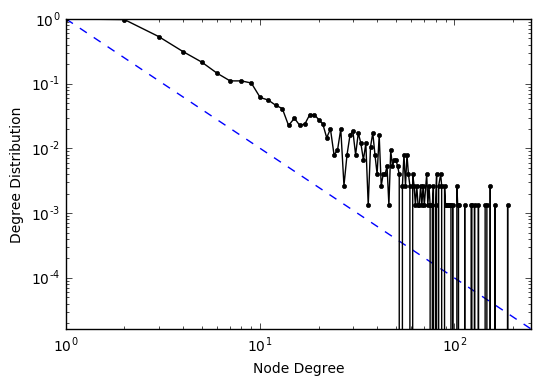

In [29]:
rng = range(len(index))
plt.plot(index, index**-2., "b--")
plt.plot(index,n_enllacos[0],'k.-')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Node Degree')
plt.ylabel('Degree Distribution')
plt.ylim(min( n_enllacos[0]),max( n_enllacos[0]))
plt.xlim(0, max(index))
plt.show()

Computing the average clustering coefficient for the graph g_und:

In [30]:
cluster_gr=df.groupby(['val'])['cluster'].mean()

In [31]:
x = np.arange(1,len(cluster_gr.index[1:]))
y = x**-1.

* **Clustering Coefficient**

The clustering coefficient captures the degree to which the neighbors of a given node link to each other. For a node i with degree ki the local clustering coefficient is defined as $C_i = \frac{2L_i}{k_i(k_i-1)}$, where $L_i$ represents the number of links between the $k_i$ neighbors of node i.

Also the theoretical slope approximation as a power low of $y \sim x^{-1}$ is also shown in blue, the trend of which does not resemble as much the obtained result in this case.

The average clustering of the network is obtained in the following cell, which is of 0.48. 
It is the overall level of clustering in a network, and it basically calculates the average of the local clustering coefficients of all the vertices, and therefore informs of how much does the network tend to create local clusters.

In this case it is close to 0.5, which implies that there is about 50% chance that two neighbors of a node are linked.

In [32]:
nx.average_clustering(g_und)

0.48833620245296233

It seems intuitive due to the nature of the network that airports with a very low degree, therefore small amount of flights will tens to create clusters with nearby airports, given that they will be less interconnected with other worldwide airports. 

This is what is reflected in the Clustering coefficient vs degree graph, where the clustering coefficient decreases the higher the degree of a node.

In order to travel from one of these low degree nodes, to another cluster several jumps will be needed, thus one should be in the right side nodes of the graph. 
Major airports however are more connected with other major airports in around the world, and not so much with smaller reagional airports, which might only be connected with some other 2 or 3 airports.

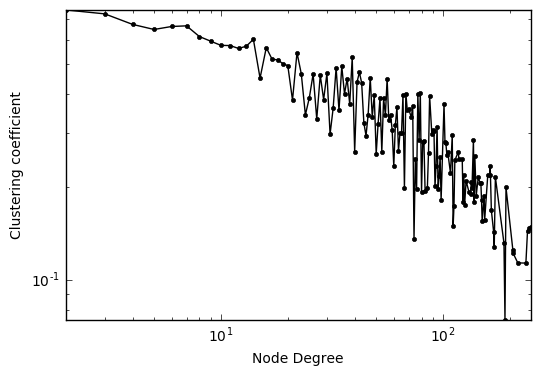

In [77]:
rng = np.arange(len(cluster_gr.index[1:]))
#plt.plot(rng, rng**(-1.), "b--")
plt.plot(cluster_gr.index[1:], cluster_gr.values[1:],'k.-')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Node Degree')
plt.ylabel('Clustering coefficient')
plt.ylim(min( cluster_gr.values[1:]),max( cluster_gr.values[1:]))
plt.xlim(0, max(cluster_gr.index[1:]))
plt.show()

* **Analysis of the Degrees of separation of the Network**

We firstly create a dictionary with the shortest paths of each airport to all other airports. This can later be used to analyze the portion of airports that are reachable from each airport. The calculation is somewhat similar to the closeness centrality, given that the calculation is based on the shortest paths to the other nodes in the network, but here, instead of computing the mean of these shortest paths, we search for the proportion of airports that are reachable with a certain amount of jumps, giving us an idea of the "overall connectivity" of the network.

In [34]:
shortest_paths = nx.shortest_path_length(g_und)

In [35]:
l = shortest_paths
k=6

The following function returns the ratio of airports that are reachable from all airports. In order to do so all shortest paths are provided and also the maximum number of jumps. Therefore it returns mean( reachable/non-reachable ).

In [36]:
def separation_degrees(shortest_paths, with_n_jumps):
    n = len(shortest_paths)
    coef = [None] * n
    for shortest_path, i in zip(shortest_paths.values(), range(n)):
        jumps = np.array(shortest_path.values())
        # Ratio of aerports that are reachable with n jumps
        coef[i] = np.float(len(jumps[jumps <= with_n_jumps]))/np.float(len(jumps)-1)
    return round(np.mean(coef),4)

In [37]:
sample = []
for i in np.arange(1,10):
    perc = separation_degrees(shortest_paths,i)
    sample.append(perc)

The resulting plot shows the amount of airports that are reachable for different amount of jumps.

As it can be seen, for a maximum amount of jumps of 6, almost the totallity (96%) of airports are, in general, reachable from any other airport. 

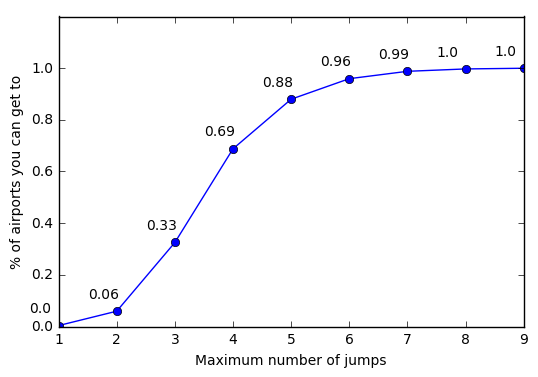

In [38]:
plt.plot(np.arange(1,10),sample,'o-')
plt.xlabel('Maximum number of jumps')
plt.ylabel('% of airports you can get to')
plt.ylim(0,1.2)
for a,b in zip(np.arange(1,10),sample): 
    plt.text(a-0.5, b+0.05, str(round(b,2)))
plt.show()

This function, in the oposite way, calculates the maximum amount of jumps required from a specific airport to reach any other airports worldwide.

In [39]:
def jumps_to_reach_any_airport(shortest_paths,city):
    max_jump = [{i: max(shortest_paths[i].values())} for i in shortest_paths]
    finalMap = {}
    for max_jump_per_cities in max_jump:
        finalMap.update(max_jump_per_cities)
    return finalMap[city]

Taking as an example the Barcelona airport, from this function we can say that the maximum amount of jumps to reach any other airport arround the World is 8:

In [40]:
jumps_to_reach_any_airport(shortest_paths,'BCN')

8

So an interesting quiestion could be, from which airports do we need the lowest amount of jumps to reach any other airport?

In [41]:
newL = [{i: max(shortest_paths[i].values())} for i in shortest_paths]
finalMap = {}
for d in newL:
    finalMap.update(d)

In [42]:
world_hubs = [{i:j} for i,j in zip(finalMap,finalMap.values()) if j==min(finalMap.values())]

The resulting dictionary shows which are the airports with the minimum amount of jumps required (7 in this case), to reach any other airport. Therefore, the following airports can be seen as the **"most interconnected"** airports.

In [43]:
world_hubs

[{'ORD': 7},
 {'PVG': 7},
 {'LHR': 7},
 {'SEA': 7},
 {'FRA': 7},
 {'NRT': 7},
 {'JFK': 7},
 {'YEG': 7},
 {'PEK': 7},
 {'BOS': 7},
 {'FLL': 7},
 {'DXB': 7},
 {'SFO': 7},
 {'KEF': 7},
 {'IAD': 7},
 {'YYZ': 7},
 {'DEN': 7},
 {'AMS': 7},
 {'LAX': 7},
 {'CDG': 7},
 {'EWR': 7}]

Which, can be more easily seen with a D3 visualization, where the radious of each airport is proportional to its degree centrality:

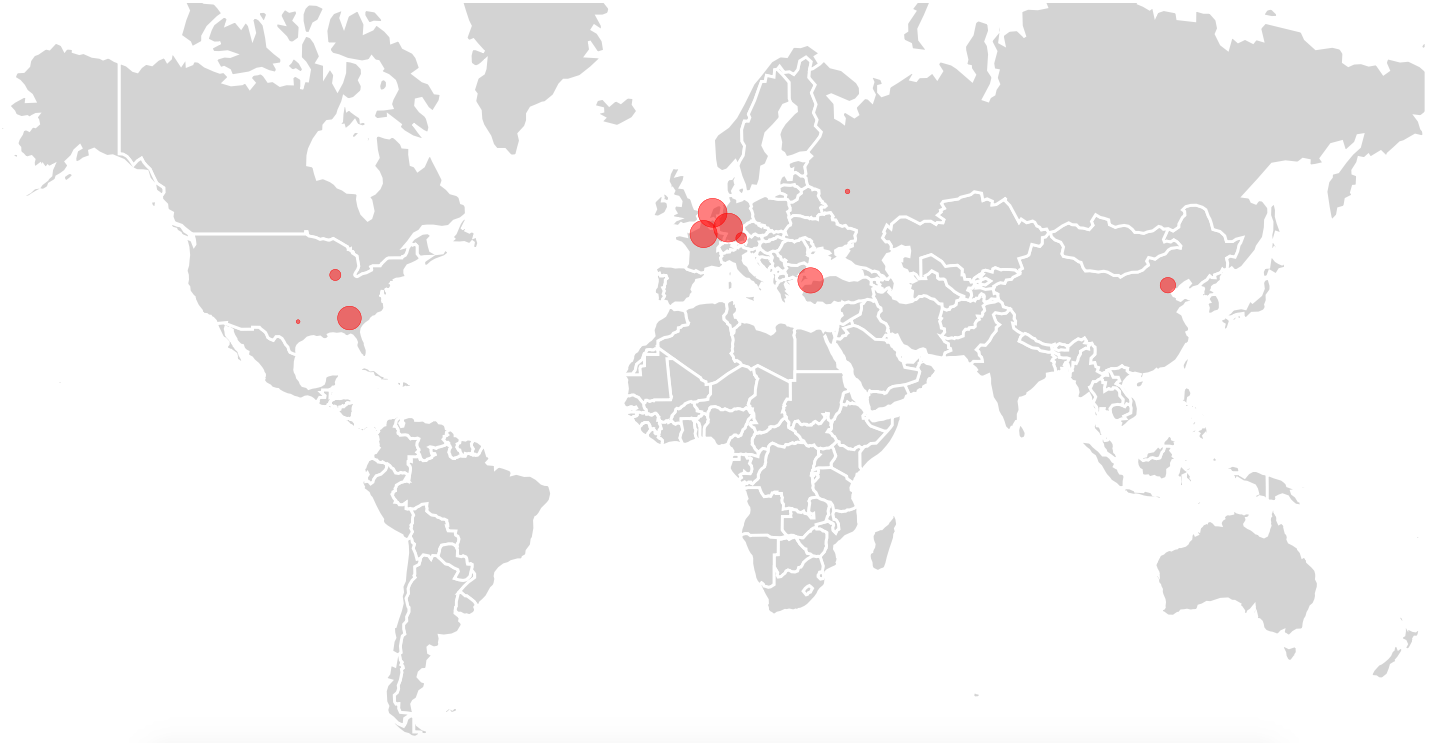

In [44]:
Image("images/Hubs.png")

-----------

* <h2> Analysis as a Directed Network </h2>

In this section a direted graph is built and consequently the origin and destination of each flight are taken into consideration. However for the majority of flights, the reverse direction of each of these also takes place.

In [45]:
g = nx.DiGraph()

In [46]:
g.name = 'Directed Network'

Same nodes and routes:

In [47]:
g.add_nodes_from(airports)

In [48]:
g.add_weighted_edges_from(input_tuple)

* **Centrality analysis of the network:**

In [49]:
degree_centrality = nx.degree_centrality(g)
key = sorted(degree_centrality, key=degree_centrality.__getitem__)[::-1]
values = sorted(degree_centrality.values())[::-1]
values = np.reshape(values,(len(values),1))
key = np.reshape(key,(len(key),1))
degree_centrality = np.concatenate([key,values],axis=1)

From the previous, the most central nodes of the network are obtained. The ten most centrla airports are in this case:

In [50]:
for i in degree_centrality[:20]: print i

['FRA' '0.140459363958']
['CDG' '0.13839811543']
['AMS' '0.136336866902']
['IST' '0.13457008245']
['ATL' '0.127502944641']
['PEK' '0.121319199058']
['ORD' '0.120435806832']
['MUC' '0.111896348645']
['DME' '0.111307420495']
['DFW' '0.109540636042']
['DXB' '0.108951707892']
['LHR' '0.100706713781']
['DEN' '0.099234393404']
['IAH' '0.099234393404']
['LGW' '0.0971731448763']
['BCN' '0.0959952885748']
['JFK' '0.0948174322733']
['FCO' '0.093050647821']
['MAD' '0.0924617196702']
['EWR' '0.0898115429918']


Where the most central airports as seen in the list are **Frankfurt** - **Paris-Charles de Gaulle** - **Amsterdam**, **Istanbul** - **Atlanta** - **Pekin** - **Chicago O'Hare Airport** - **Munich Airport** - **Moscow Domodedovo airport** - **Dallas/Fort Worth Airport (Texas)** - **Dubai Airport** - **London Heathrow** - **Denver International Airport  (Colorado)** - **Houston Airport** - **London Gatwick airport** - **El prat, Barcelona** - **John f. Kennedy NY** - **Fiumicino, Roma** - **Barajas, Madrid** - **Newark Liberty, NY**

Which visualizing them in the map correspond to:

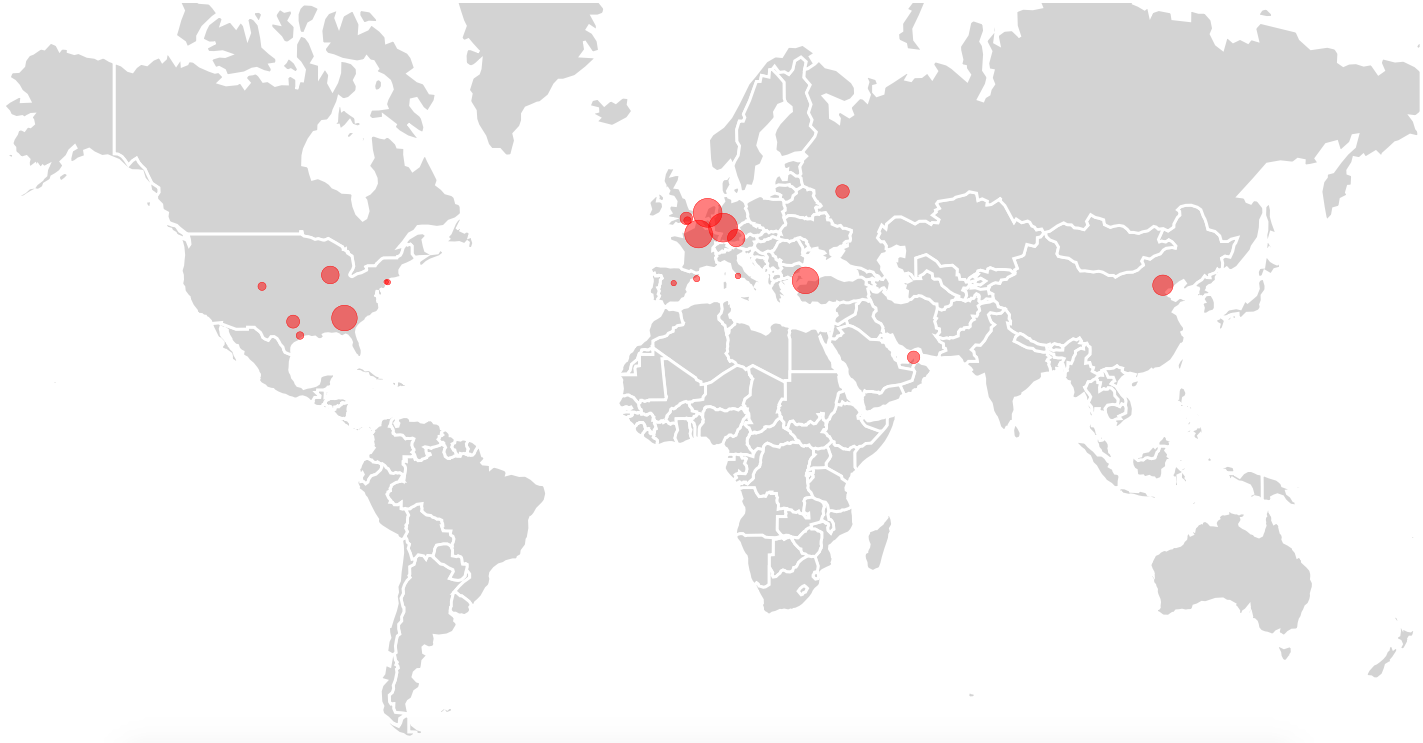

In [51]:
Image("images/degree.png")

Therefore basically this measure is mainly informing of the biggest airports, the airports that have a higher degree therefore the higher number of flights.

And here the analysis is performed, but for the in-degree centrality and the out-degree centrality, which, as results show, are almost identical, given that most of the flights exist in both directions.

In [52]:
in_degree_centrality=nx.in_degree_centrality(g)
key = sorted(in_degree_centrality, key=in_degree_centrality.__getitem__)[::-1]
values = sorted(in_degree_centrality.values())[::-1]
values = np.reshape(values,(len(values),1))
key = np.reshape(key,(len(key),1))
in_centr= np.concatenate([key,values],axis=1)

In [53]:
for i in in_centr[:10]: print i

['FRA' '0.0700824499411']
['CDG' '0.0686101295642']
['AMS' '0.0680212014134']
['IST' '0.067726737338']
['ATL' '0.0636042402827']
['PEK' '0.0606595995289']
['ORD' '0.0597762073027']
['MUC' '0.0556537102473']
['DME' '0.0556537102473']
['DFW' '0.0544758539458']


In [54]:
out_degree_centrality=nx.out_degree_centrality(g)
key = sorted(out_degree_centrality, key=out_degree_centrality.__getitem__)[::-1]
values = sorted(out_degree_centrality.values())[::-1]
values = np.reshape(values,(len(values),1))
key = np.reshape(key,(len(key),1))
out_centr= np.concatenate([key,values],axis=1)

In [55]:
for i in out_centr[:10]: print i

['FRA' '0.0703769140165']
['CDG' '0.0697879858657']
['AMS' '0.0683156654888']
['IST' '0.0668433451119']
['ATL' '0.0638987043581']
['PEK' '0.0606595995289']
['ORD' '0.0606595995289']
['MUC' '0.0562426383981']
['DME' '0.0556537102473']
['DXB' '0.055359246172']


* **Closeness centrality**

The closeness centrality of a node is the average length of the shortest path between the node and all other nodes in the graph. Thus the more central a node is, the closer it is to all other nodes.

In [56]:
degree = nx.closeness_centrality(g)

In [57]:
key = sorted(degree, key=degree.__getitem__)[::-1]
values = sorted(degree.values())[::-1]
values = np.reshape(values,(len(values),1))
key = np.reshape(key,(len(key),1))
closeness_centrality = np.concatenate([key,values],axis=1)

In [58]:
for i in closeness_centrality[:10]: print i

['FRA' '0.396704820027']
['CDG' '0.39419019856']
['LHR' '0.39262320841']
['DXB' '0.387861665689']
['AMS' '0.386878606167']
['LAX' '0.38404692378']
['JFK' '0.382037121903']
['YYZ' '0.377654779749']
['IST' '0.37516549006']
['ORD' '0.374788649724']


As it can be seen this calculation yields very similar results to thoes obtained through the previous calculation in the section "*Analysis of the Degrees of separation of the Network*", given that the calculation is similar. Specifically, selecting the 10 airports with higher closeness centrality, both results only differ with one airport, Istanbul.

Recall that the results obtained through the previous algorithm, were:

In [59]:
np.reshape(world_hubs,(1,len(world_hubs)))

array([[{'ORD': 7}, {'PVG': 7}, {'LHR': 7}, {'SEA': 7}, {'FRA': 7},
        {'NRT': 7}, {'JFK': 7}, {'YEG': 7}, {'PEK': 7}, {'BOS': 7},
        {'FLL': 7}, {'DXB': 7}, {'SFO': 7}, {'KEF': 7}, {'IAD': 7},
        {'YYZ': 7}, {'DEN': 7}, {'AMS': 7}, {'LAX': 7}, {'CDG': 7},
        {'EWR': 7}]], dtype=object)

The only airport not included in this list of the airports with higher closeness centrality is:

In [60]:
set(zip(*closeness_centrality[:10])[0]) - set(zip(*world_hubs)[0])

{'IST'}

These results however, differ quite a lot from thoes obtained with the degree centrality measure. As it can be see in this case, there are several airports with the highest centrality not included in the list of airports obtained through the previous algorithm:

In [61]:
set(zip(*degree_centrality[:10])[0]) - set(zip(*world_hubs)[0])

{'ATL', 'DFW', 'DME', 'IST', 'MUC'}

So these results suggest that in the air traffic network, higher amount of connections of an airports do not imply an also very high interconnectivity with all other major airports in some cases.

This can be seen with an example. Atlanta airport for example is within the top 5 most central airports, as it has many connections, specially with all other important US airports, as the following image shows:

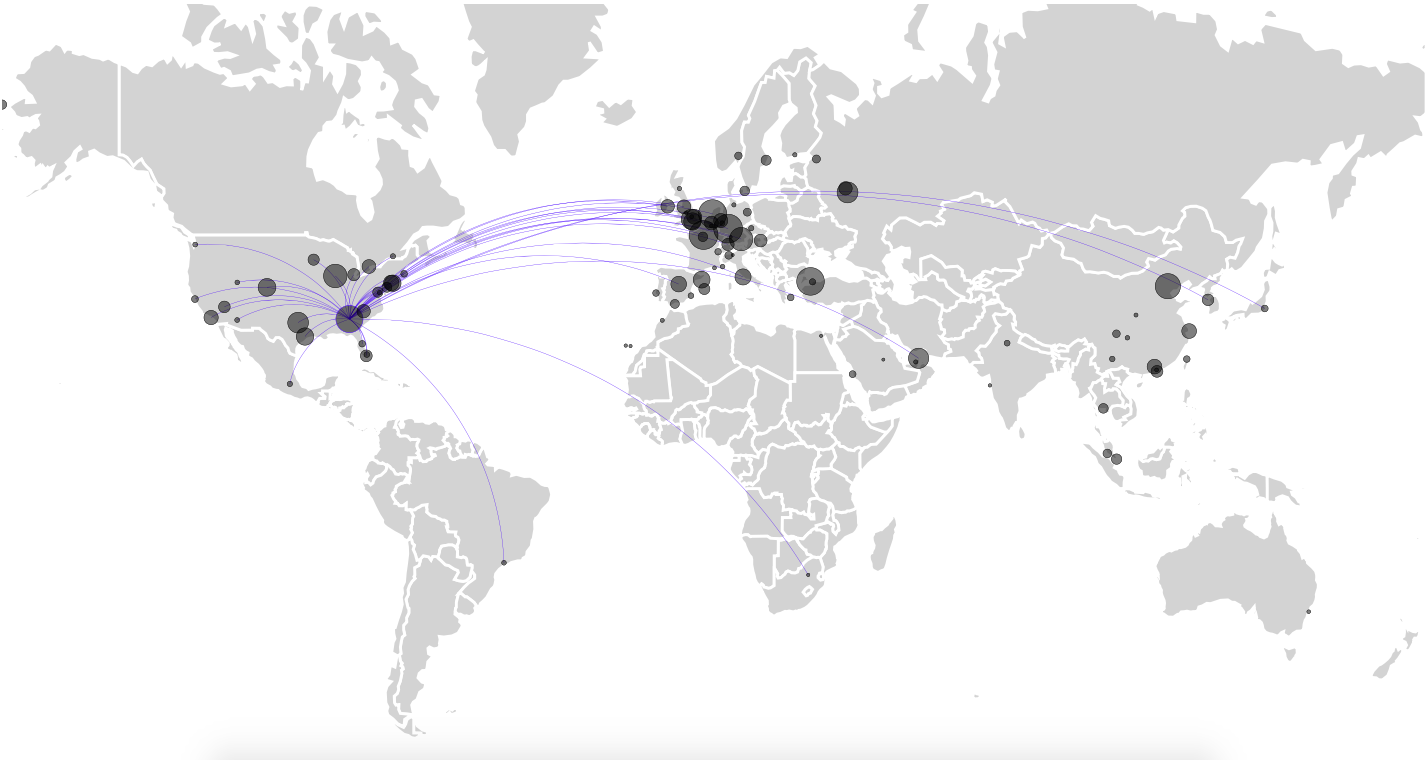

In [11]:
Image("images/Atlanta.png")

Now lets look at the connections of Amsterdam airport:

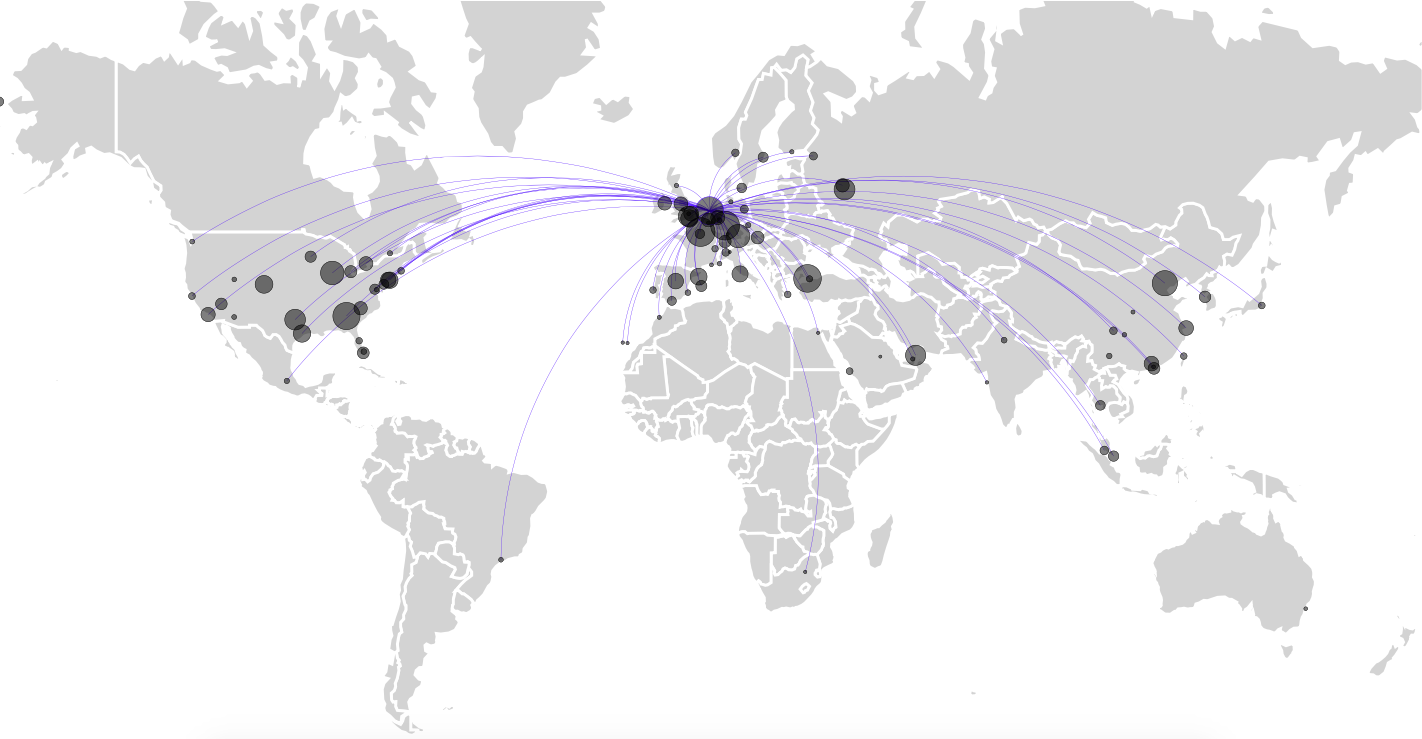

In [13]:
Image("images/Amsterdam.png")

What we can notice from the previous is that Amsterdam, a part from having a high centrality, it seems more interconnected with other very central airports (the airports included in this visualization are the 100 more central), from which it seems intuitive that any other airport in the world is on average more easily reached, or with less jumps.

Something similar can be observer with the Page Rank calculation, in the following section, given that the calculation of the algorithm, allthough being an entire different algorithm, it also takes into account the importance of the connections.

* ** Page Rank**

PageRank computes a ranking of the nodes in the graph G based on the structure of the incoming links. It was originally designed as an algorithm to rank web pages. In this case as results show, the most ranked pages can be seen as an alternative calculation of the world hubs, or most important airports. 

The results are similar to thoes obtained from the most central airports, but with slight differences as, in this case it is not so important the amount of connections or centrality, but the importance of the incoming links of each airport. Therefore a higher ranked airport in the network will be characterized by having a high amount incoming links from other important airports, not necessarily just a high amount of connections, thus a high degree centrality.

In [53]:
pr = nx.pagerank(g)

In [54]:
key = sorted(pr, key=degree.__getitem__)[::-1]
values = sorted(pr.values())[::-1]
values = np.reshape(values,(len(values),1))
key = np.reshape(key,(len(key),1))
pr = np.concatenate([key,values],axis=1)

Top ten ranked airports with the Page Rank algorithm:

In [55]:
for i in pr[:10]: print i

['FRA' '0.00934017190144']
['CDG' '0.00588209141797']
['LHR' '0.00569489443868']
['DXB' '0.0054012136906']
['AMS' '0.00495954665925']
['LAX' '0.00495912134448']
['JFK' '0.0048693812334']
['YYZ' '0.00479998207724']
['IST' '0.00477746293446']
['ORD' '0.00452552670485']


Which is quite similar to the list of the most central airports:

In [56]:
for i in degree_centrality[:10]: print i

['FRA' '0.140459363958']
['CDG' '0.13839811543']
['AMS' '0.136336866902']
['IST' '0.13457008245']
['ATL' '0.127502944641']
['PEK' '0.121319199058']
['ORD' '0.120435806832']
['MUC' '0.111896348645']
['DME' '0.111307420495']
['DFW' '0.109540636042']


The highest ranked cities obtained through the Page Rank algorithm can be visualized bellow:

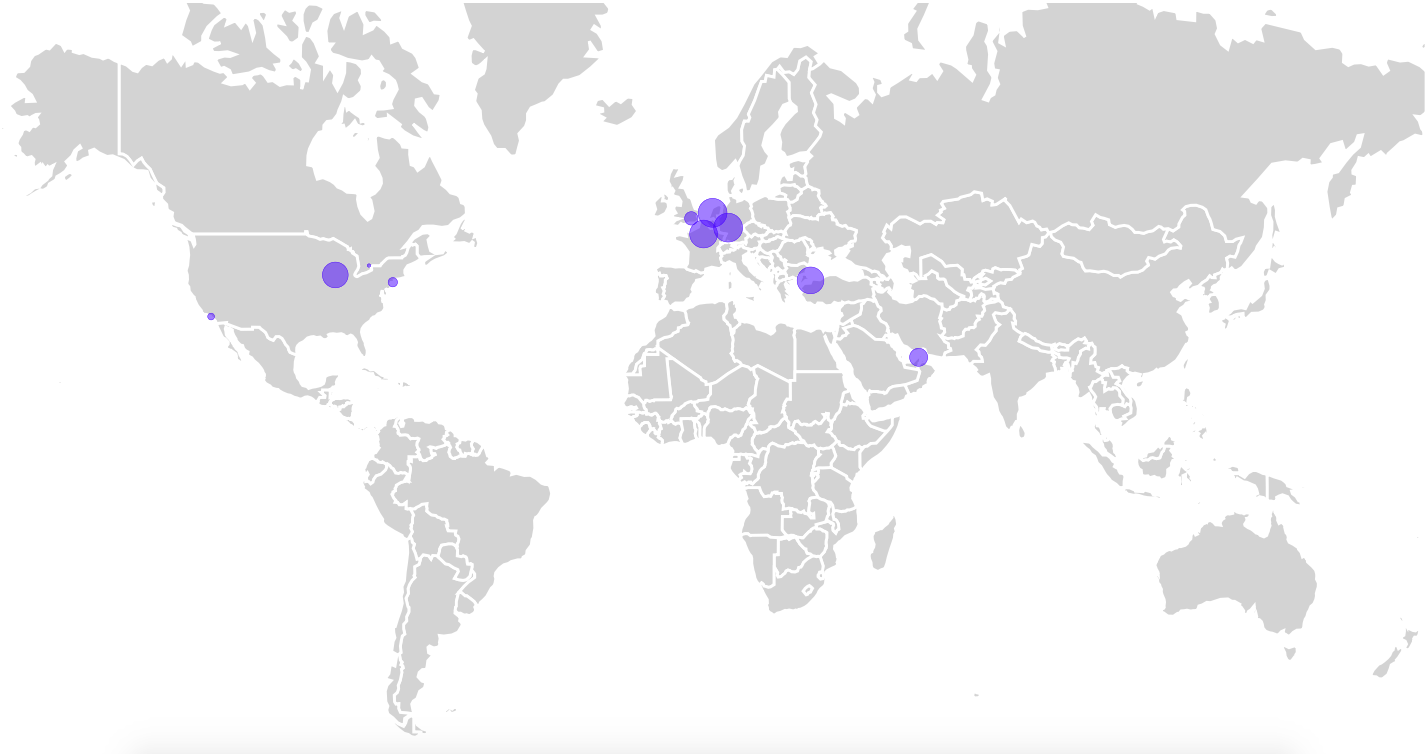

In [7]:
Image("images/pr.png")

* **Degree Distribution analysis**

* In degree distribution:

In [57]:
in_degree = g.in_degree()
df = pd.DataFrame()
df['val'] = in_degree.values()
df['key'] = in_degree.keys()

In [58]:
dades = df.groupby(['val']).count()

In [59]:
dades = dades[dades['key']!=0]

In [60]:
index= np.array(dades.index)
n_enllacos = np.array(dades.key)
n_enllacos=map(float,n_enllacos)
n_enllacos = np.reshape(n_enllacos,(1,len(n_enllacos)))

In [61]:
n_enllacos = (n_enllacos-n_enllacos.min())/(n_enllacos.max()-n_enllacos.min())

* Out degree distribution:

In [64]:
out_degree = g.out_degree()
out = pd.DataFrame()
out['val'] = out_degree.values()
out['key'] = out_degree.keys()

In [65]:
out_degree = out.groupby(['val']).count()

In [66]:
out_degree = out_degree[out_degree['key']!=0]

In [67]:
index_out = np.array(out_degree.index)
n_enllacos_out = np.array(out_degree.key)
n_enllacos_out=map(float,n_enllacos_out)
n_enllacos_out = np.reshape(n_enllacos_out,(1,len(n_enllacos_out)))

In [68]:
n_enllacos_out = (n_enllacos_out-n_enllacos_out.min())/(n_enllacos_out.max()-n_enllacos_out.min())

The following graph depicts the incomming and outcomming degree distribution of the network. It is shown on a double logarithmic graphic.

It is also shown that in this case both distributions are approximated by a power low of approximately $y \sim x^{-2}$. In some cases both parameters $\gamma$  of $p_{k_{in}}=k^{-\gamma_{in}}$ and $p_{k_{out}}=k^{-\gamma_{out}}$ can differ, being $\gamma_{in}$ and $\gamma_{out}$ are the degree exponents for the in- and out-degrees, and can be approximated by diffferent power laws, but in this case it makes sense that they are similar given that almost all flights are both incoming and outgoing.

As it can be deduced then we have a scale-free network is a network whose degree distribution follows a power law.

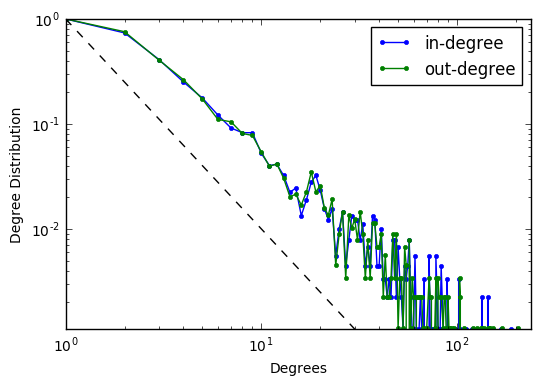

In [69]:
plt.plot(index,n_enllacos[0],'b.-')
plt.plot(index_out,n_enllacos_out[0],'g.-')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Degrees')
plt.ylabel('Degree Distribution')
plt.xlim(min(index), max(index))
plt.ylim(min(n_enllacos[0]), max(n_enllacos[0]))
plt.legend(['in-degree','out-degree'])
rng = range(len(index))
plt.plot(index, index**-2., "k--")
plt.show()


As it can be seen, and on another han is expectable, higher degrees are minoritary in the network. Must of the airports in the network are regional, and have a small amount of links to other close airports.

* **Assorttivity of the Network**

The assortativity coefficient of networks is somehow giving a measure of how the hubs of the network are connected to the rest of the network. 

In assortative networks hubs tend to connect to other hubs, hence the higher is the degree k of a node, the higher is the average degree of its nearest neighbors. 

Whereas in disassortative network hubs prefer to link to low-degree nodes.

Using the following Networkx builtin functions we can obtain the assortativity_coefficient of the network:

In [111]:
r = nx.degree_pearson_correlation_coefficient(g) 
print r

-0.0117811476718


In [112]:
assrt = nx.degree_assortativity_coefficient(g) 
print assrt

-0.0117811476718


In this case, given that the coeficient is negative, we can say that the network is mainly **dissortative**. However the value is very small, indicating a relatively neutral measure in terms of identifying a clear structure with in Assortative and Dissortative networks.

The main issue in this case from our perspective, is that the main airports are not only connected with other hubs, which mainly are, but all they are also (and mainly) connected to other small airports, mainly close airports, representing a more important quantity of links of most airports.

Taking as an example the airport of Barcelona, it is connected mainly to other European airports, which in their majority are not going to be Worl Hubs. However it will be connected to most of the less central closer airports in its neighbour countries.

* <h2> Communities </h2>

In this section we use the DPClus algorithm, in order to obtain possible communities that take place the Network.

DPClus weights all the nodes in its first step. Then DPClus
takes the highest weighted node as the initial cluster and extends this cluster by adding
nodes from its neighbors. DPClus uses two parameters $d_{in}$ and $cp_{in}$ ($d_{in}$ is a value
of minimum density and $cp_{in}$ is a minimum value for cluster property) to determine
whether a neighbor should be added to the cluster. Here, the values of $d_{in}$ and $cp_{in}$ are
0.9 and 0.5 respectively.

The source code is also included in the file, the authors of which refer to it in the following paper http://cs.unc.edu/~jtprice/papers/price_pena_cho_2013.pdf .

The following code generates the output files from the algorithm, where each line represents a different cluster.

This first vesion generates clusters with no overlapping but without taking into account their weight. 

In [1]:
#!python files/dpclus_no_overlap.py files/my_routes_no_w.csv > files/output_files/clustering_dpclus_no_overlap.txt

This version of the algorithm generates clusters with overlapping, but taking into account the weight of all links.

In [2]:
#!python files/dpclus_weighted.py files/my_routes_with_weigths.csv > files/output_files/clustering_dpclus_weighted.txt

In order to see the clusters that are generated from the algorithm, they can be found in a .txt file in the files/output_files folder.


We have used the following data, which is a subset of clusters of the output file (each line represents a cluster):

From the generated file, we have taken the more relevant clusters and made a visualization using D3. The visualization depicts the major clusters that have been created using the algorithm in which there is no averlapping of the airports.

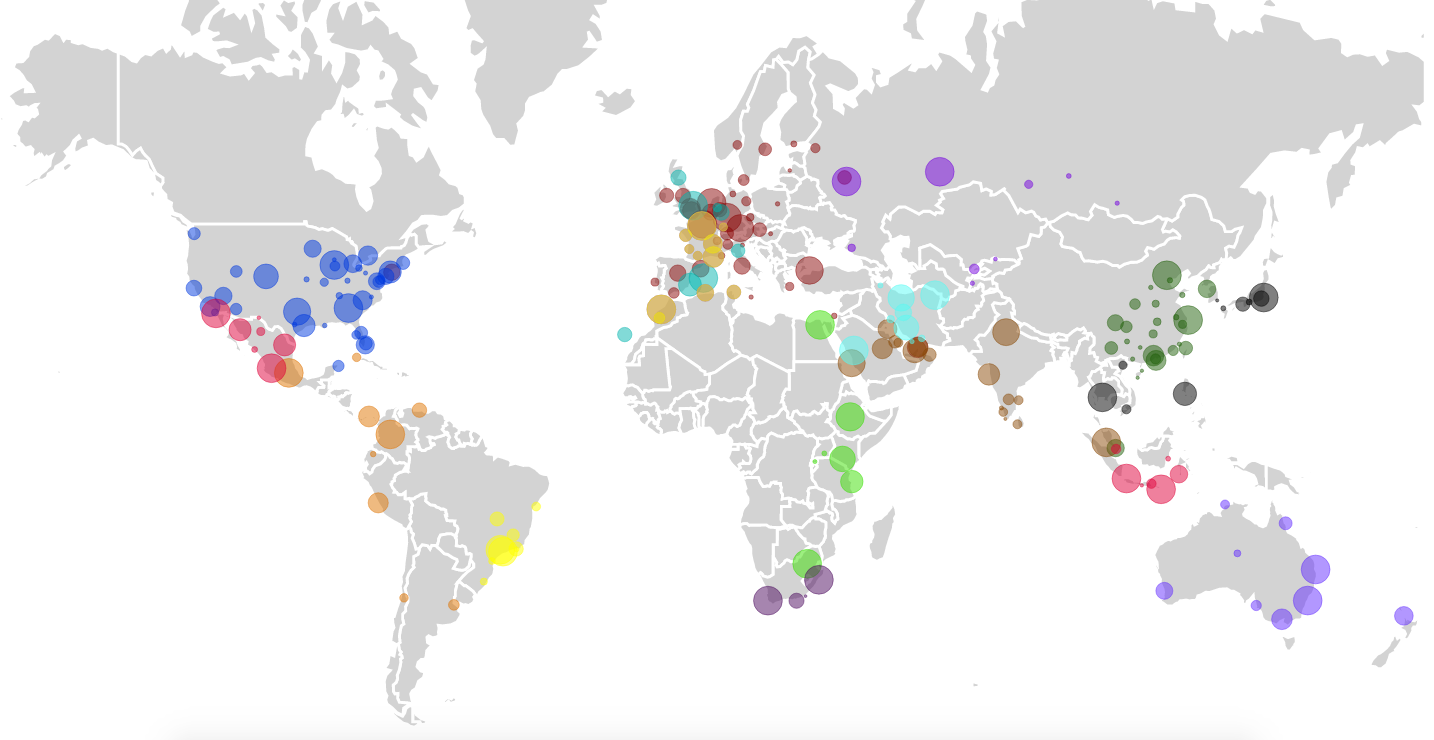

In [8]:
Image("images/clusters.png")

As expectable, clusters have mainly been created in concordance with geographical proximity. Which is expectalbe given that people mostly travel at nearby destination for work issues, or to visit family or friends.

Clearly different clusters are generated for different continents, as the flight exchange between these is much less.

It can be noticed that 3 main clusters are created in Europe. One depicted in red where most of the European geographic area is covered. One in blue and a another in yellow. It can be seen how apparently usual destinations of flights from France are in the same country or in North African countries, so french ex-colonies such as Tunisia, Argelia and Morocco.

Whereas most English flights head to the nicer weather Mediterranean cities from Spain or Italy.

* <h2>  Visualization of the network using D3 </h2>

A part from the analysis of the network that has been performed in this notebook, we have also performed a general visualization of the network using D3.

In this visualization the 100 most central airports are shown, using "bubbles", where the radious of the bubble is obtained as a function of its centrality. And also all routes between these nodes are included.

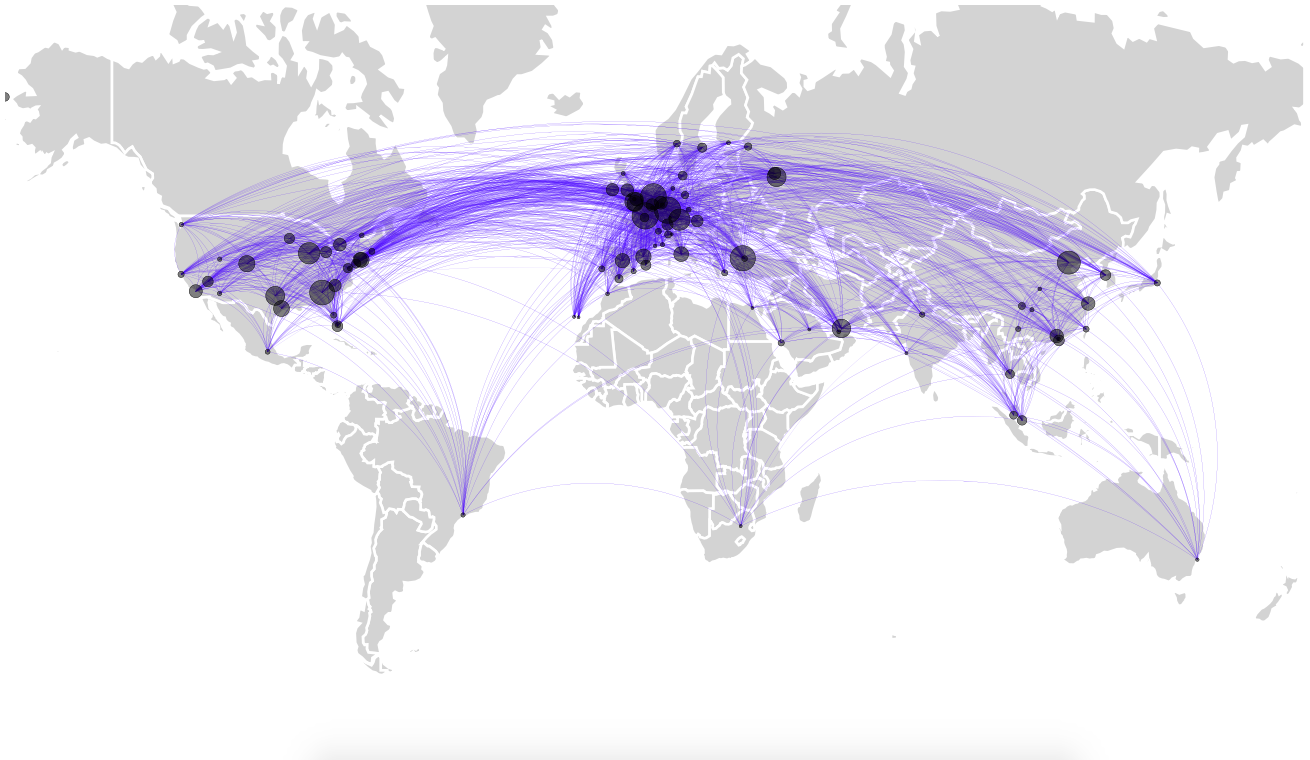

In [9]:
Image("images/D3.png")

In order to be able to view all links of each node in specific, we have also added an interactivity feature in which by hovering with the mouse on top of a node, only the links of this node appear. As it can be seen in the following image, in which the links of the Barcelona airport appear:

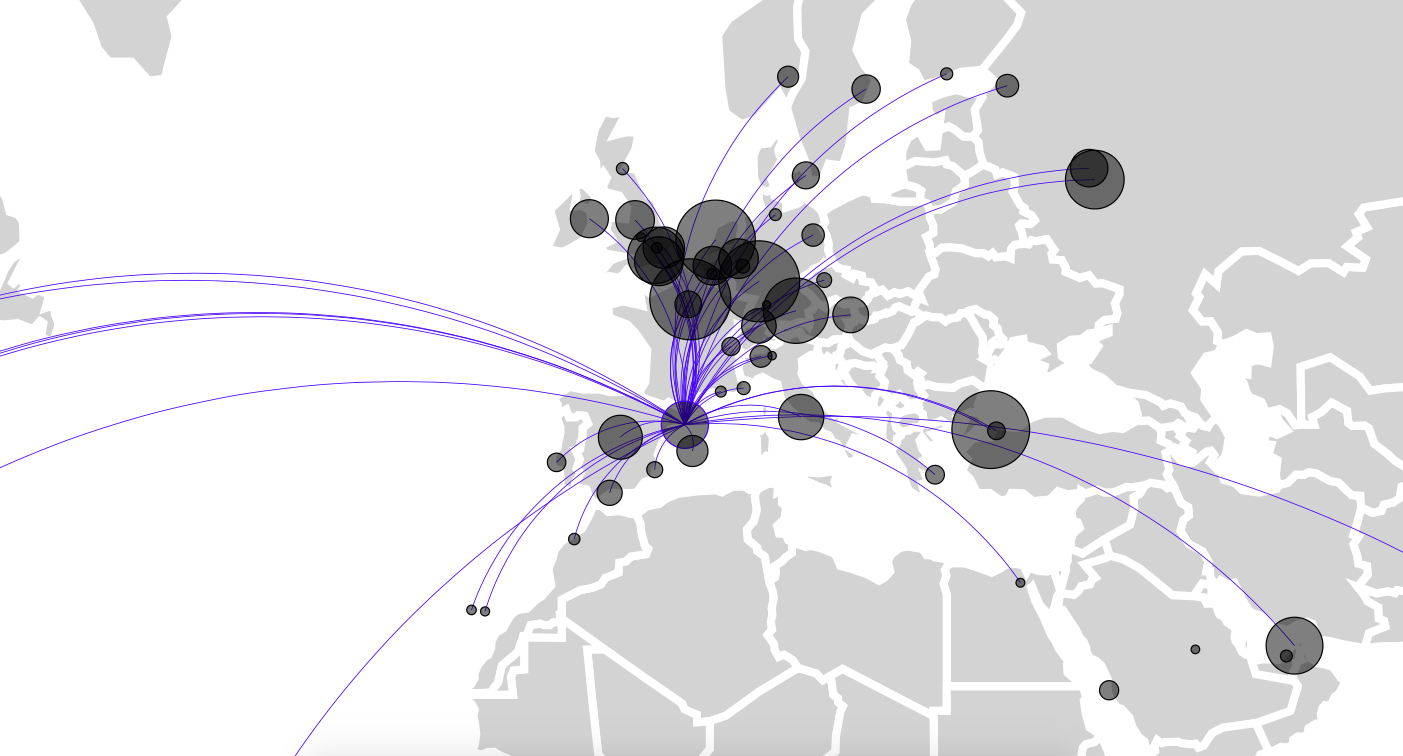

In [10]:
Image("images/BCN_links.png")

All other mentioned visualizations, including this interactive one are included in the zip file that has been attached, feel free to give them a look. We hope you enjoyed reading this project as much as we did doing it.